<a href="https://colab.research.google.com/github/Welle-Kim/ML_multicampus/blob/master/Analysis_for_heart_failure_clinic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 각 파일의 컬럼은 아래와 같습니다.
- age: 환자의 나이
- anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
- creatinine_phosphokinase: 크레아틴키나제 검사 결과
- diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
- ejection_fraction: 박출계수 (%)
- high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
- platelets: 혈소판 수 (kiloplatelets/mL)
- serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
- serum_sodium: 혈중 나트륨 레벨 (mEq/L)
- sex: 성별 (0: 여성, 1: 남성)
- smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
- time: 관찰 기간 (일)
- DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [9]:
df.shape

(299, 13)

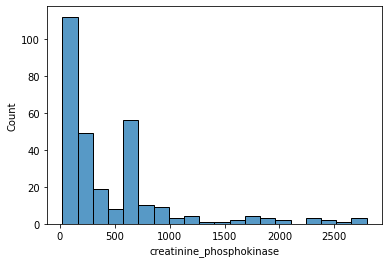

In [14]:
# creatinine_phosphokinase: 크레아틴키나제 검사 결과과 3000이하인 것
sns.histplot(data=df.loc[df['creatinine_phosphokinase']< 3000,'creatinine_phosphokinase'])

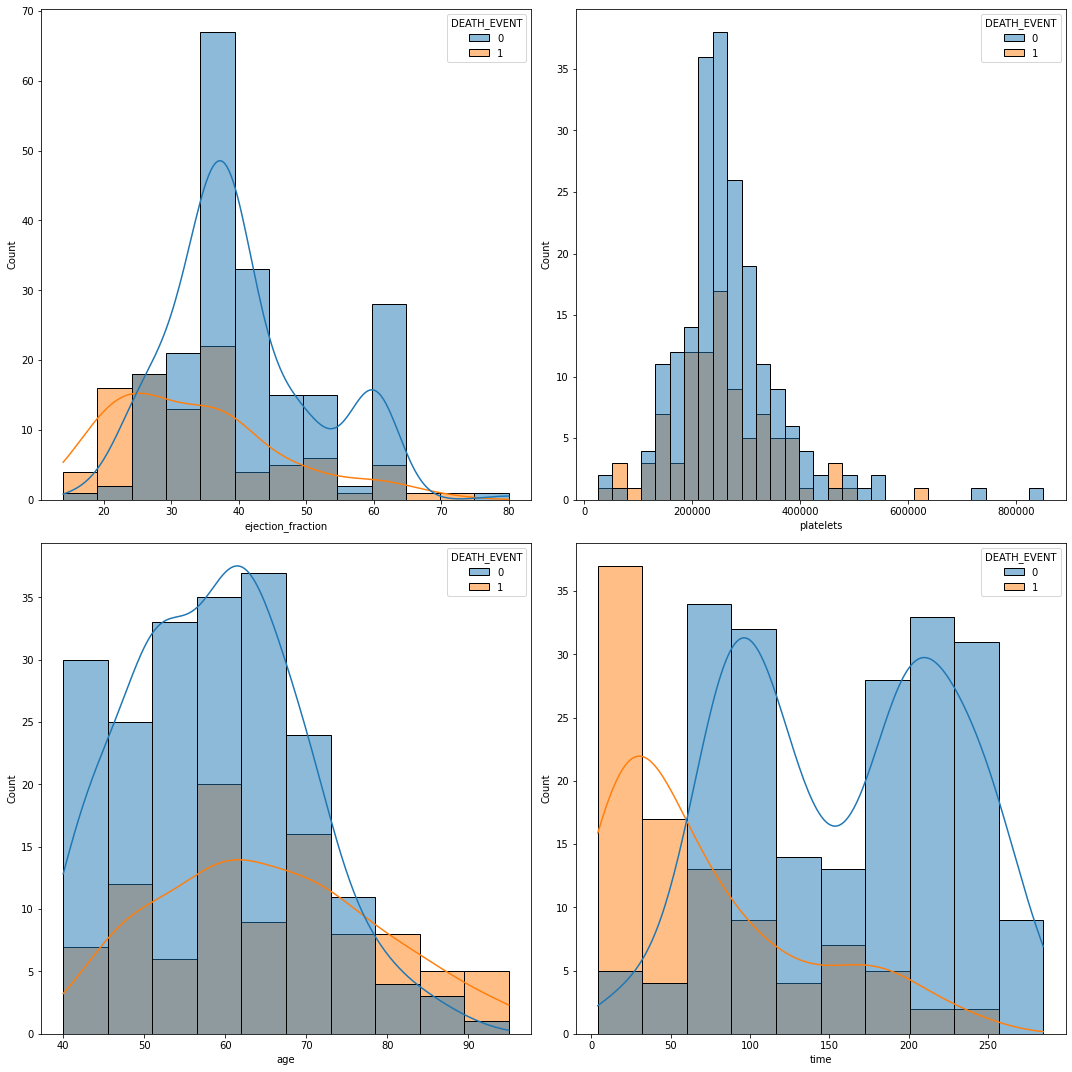

In [18]:
plt.subplot(221)
sns.histplot(x="ejection_fraction",data=df,bins=13,hue="DEATH_EVENT",kde=True)
plt.subplot(222)
sns.histplot(x='platelets', data=df, hue='DEATH_EVENT')
plt.subplot(223)
sns.histplot(x='age',data=df,hue="DEATH_EVENT",kde=True)
plt.subplot(224)
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

plt.tight_layout()
plt.rcParams["figure.figsize"]=(30,30)

plt.show()

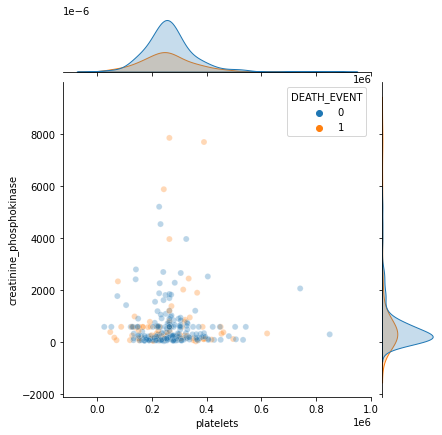

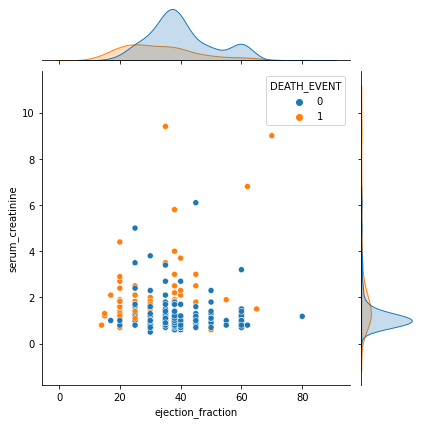

In [45]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', hue='DEATH_EVENT', data=df, alpha=0.3)
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT')


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


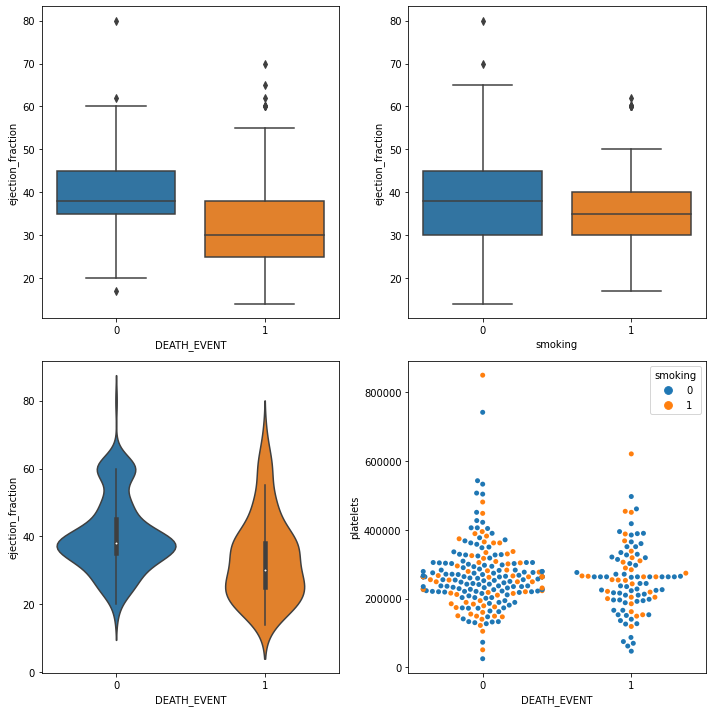

In [50]:
plt.subplot(221)
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)
plt.subplot(222)
sns.boxplot(x='smoking', y='ejection_fraction', data=df)
plt.subplot(223)
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)
plt.subplot(224)
sns.swarmplot(x='DEATH_EVENT', y='platelets', hue='smoking', data=df)

plt.tight_layout()
plt.rcParams["figure.figsize"]=(30,30)

plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [52]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets','serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
y = df['DEATH_EVENT']

In [55]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기 (scaler통해 np.array 였던 거를 dataFrame으로 바꿈)
scaler=StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)

X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)

X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [59]:
from sklearn.metrics import classification_report
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



In [60]:
X_train.shape

(209, 11)

In [61]:
# 강상의 자료 입력
X_new=np.array([[1,1,1,1,1,1,1,1,1,1,1]])

print(X_new.shape)

model_lr.predict(X_new)

(1, 11)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([0])